<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>

<font color='green'>
<br />
Александр, доброго дня! рад приветствовать тебя вновь! <br />
(а дальше шаболонная обязательная часть, как ты заметила по другим спринтам)
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns

sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.seasonal import seasonal_decompose


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('/datasets/taxi.csv')

display(
    data.head(),
    data.info(),
    data.describe()
    
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, данные на базе)

In [2]:

# Функция для подсчёта ошибки
def rmse(predictions, targets): 
        return np.sqrt(((predictions - targets) ** 2).mean())
    
# Визуализация важных признаков 
def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [3]:
# Проверим порядок индекса

data.index.is_monotonic

True

Последовательность упорядочена, отлично

In [4]:
data['datetime'] = data['datetime'].astype('datetime64')


In [5]:
data.set_index('datetime', inplace=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК

## Анализ

In [6]:
# Ресемплирование по временным показателям (час / неделя / месяц)

month_resample = data.resample('1M').sum()
week_resample = data.resample('1W').sum()
hour_resample = data.resample('1H').sum()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


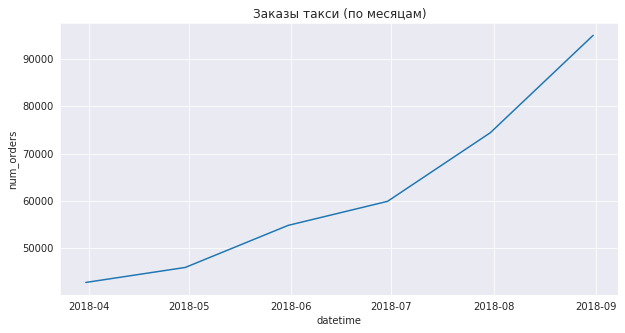

In [7]:
# График заказов по месяцам
plt.title('Заказы такси (по месяцам)')
sns.lineplot(x=month_resample.index, y=month_resample['num_orders'])

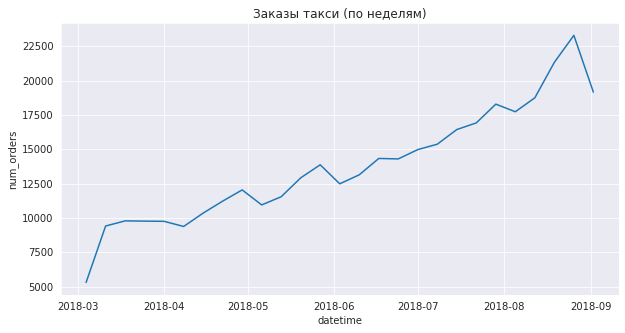

In [8]:
# График заказов по месяцам
plt.title('Заказы такси (по неделям)')
sns.lineplot(x=week_resample.index, y=week_resample['num_orders'])


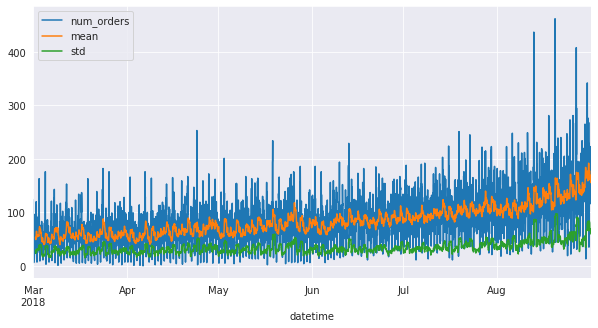

In [9]:
# График заказов по часам

hour_resample['mean'] = hour_resample['num_orders'].rolling(20).mean()
hour_resample['std'] = hour_resample['num_orders'].rolling(20).std()
hour_resample.plot()

In [10]:
# Сделаем копию для анализа

data_copy = data.copy()
data_copy = data_copy.resample('1H').sum()
data_copy['rolling_mean'] = data_copy['num_orders'].shift().rolling(12).mean()
data_copy['std'] = data_copy['num_orders'].rolling(12).std()
data_copy = data_copy.dropna()

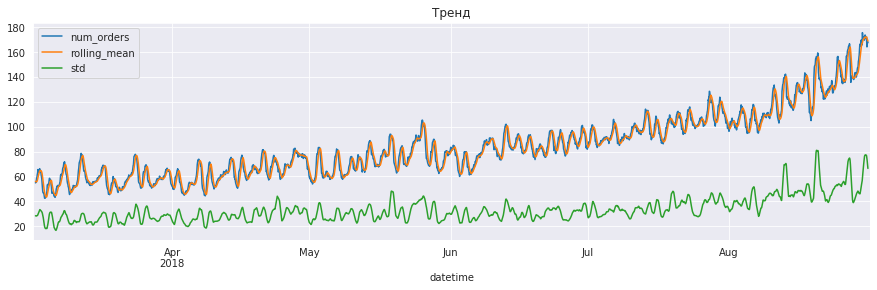

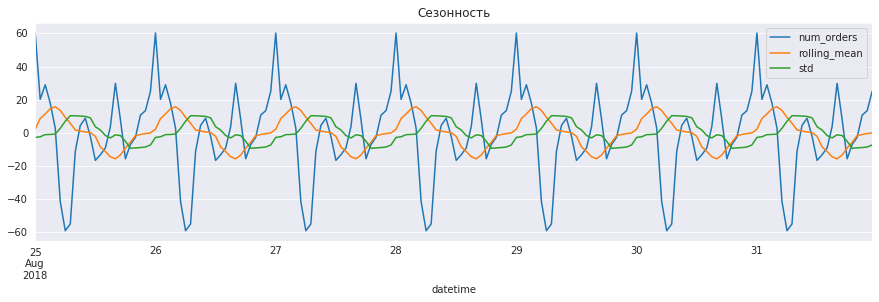

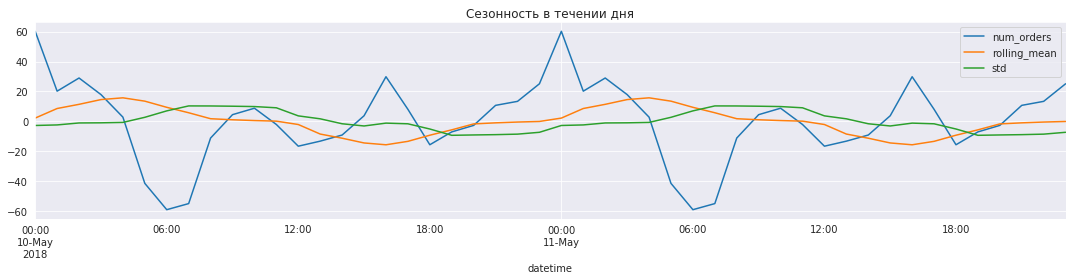

In [11]:
# производим декомпозицию ряда - выделение тренда и сезонности 
decomposed_df = seasonal_decompose(data_copy)
decomposed_df.trend.plot(title='Тренд', figsize=(15,4))
decomposed_df.seasonal.tail(24*7).plot(title='Сезонность', figsize=(15,4))
plt.figure(figsize=(15, 4))
decomposed_df.seasonal['2018-05-10':'2018-05-11'].plot(ax=plt.gca(), figsize=(15,4))
plt.title('Сезонность в течении дня')
plt.tight_layout()

## Вывод
- На первой картинке видим - число заказов растёт (восходящий тренд)
- По недельной разбивке - число заказов снижается к выходным (сезонность)
- 3я картинка показывает, что утром заказов меншьше, чем в иное буднее время

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Исследование - понятно, ОК.<br>
    
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - важный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент (как бы резюмировать твоё исследование)<br>
В реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность -  данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности может и хватить.

## Обучение

In [12]:

#выполним ресемплирование по одному часу
data = data.resample('1H').sum()

#Создадим признаки
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 9, 9)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК! факторами - 2 сезонности!!! молодец.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>Пару строк по фактору лаг и скользящее среднее:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>
        
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>
    
Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)

In [13]:
data.describe()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
count,4416.000000,4416.000000,4416.00000,4415.000000,4414.000000,4413.000000,4412.000000,4411.000000,4410.000000,4409.000000,4408.000000,4407.000000,4407.000000
mean,84.422781,3.005435,11.50000,84.395470,84.364069,84.347156,84.331369,84.319655,84.291837,84.261737,84.236162,84.228954,84.320198
std,45.023853,1.990684,6.92297,44.992356,44.949043,44.940088,44.932942,44.931299,44.898387,44.858959,44.831888,44.834421,30.263125
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.888889
25%,54.000000,1.000000,5.75000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,62.555556
50%,78.000000,3.000000,11.50000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,79.888889
75%,107.000000,5.000000,17.25000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,101.111111
max,462.000000,6.000000,23.00000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,223.111111


In [14]:
#Поделим датасет на train, test

train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()


# Обзначим признаки
X = train.drop(['num_orders'], axis=1)
y = train['num_orders']
X_test = test.drop(['num_orders'],axis=1)
y_test = test['num_orders']

In [15]:
display(
    train.head(),
    test.head()
)

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
datetime,,,,,,,,,,,,,
2018-03-01 09:00:00,69,3,9,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,50.666667
2018-03-01 10:00:00,64,3,10,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,44.555556
2018-03-01 11:00:00,96,3,11,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,42.222222
2018-03-01 12:00:00,30,3,12,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,45.000000
2018-03-01 13:00:00,32,3,13,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,41.000000


,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
datetime,,,,,,,,,,,,,
2018-08-13 14:00:00,102,0,14,119.0,92.0,144.0,156.0,137.0,91.0,39.0,66.0,83.0,103.000000
2018-08-13 15:00:00,175,0,15,102.0,119.0,92.0,144.0,156.0,137.0,91.0,39.0,66.0,105.111111
2018-08-13 16:00:00,144,0,16,175.0,102.0,119.0,92.0,144.0,156.0,137.0,91.0,39.0,117.222222
2018-08-13 17:00:00,152,0,17,144.0,175.0,102.0,119.0,92.0,144.0,156.0,137.0,91.0,128.888889
2018-08-13 18:00:00,104,0,18,152.0,144.0,175.0,102.0,119.0,92.0,144.0,156.0,137.0,135.666667


In [16]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (3965, 13)
Test shape: (442, 13)


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>ок

# Linear Regression



In [17]:

lr = LinearRegression(n_jobs=-1)
lr.fit(X,y)
lr_predictions = lr.predict(X_test)
print('RMSE:', rmse(lr_predictions,y_test))


RMSE: 54.08758434757491


# LGBM

In [18]:
#Подбор параметров
estimators = [50,100,200,250,275,300, 325, 350, 375, 400, 425, 450, 475, 480, 490, 500, 525]
forleaves = [2,5,7,12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]


for estim, leaves in zip(estimators, forleaves):
    lgb_model = lgb.LGBMRegressor(n_estimators=estim, num_leaves=leaves)
    lgb_model.fit(X,y)
    predictions = lgb_model.predict(X)
    print('RMSE with n_estimators : {} and num_leaves: {} is {}'.format(estim, leaves, rmse(predictions, y)))

RMSE with n_estimators : 50 and num_leaves: 2 is 29.447685769072727
RMSE with n_estimators : 100 and num_leaves: 5 is 22.159400472645576
RMSE with n_estimators : 200 and num_leaves: 7 is 19.212092776098753
RMSE with n_estimators : 250 and num_leaves: 12 is 15.760444567856167
RMSE with n_estimators : 275 and num_leaves: 15 is 14.010255612838403
RMSE with n_estimators : 300 and num_leaves: 20 is 11.631696439273085
RMSE with n_estimators : 325 and num_leaves: 25 is 9.62854270992388
RMSE with n_estimators : 350 and num_leaves: 30 is 7.891844653247955
RMSE with n_estimators : 375 and num_leaves: 35 is 6.490759370431599
RMSE with n_estimators : 400 and num_leaves: 40 is 5.396667259767953
RMSE with n_estimators : 425 and num_leaves: 45 is 4.2596461764687605
RMSE with n_estimators : 450 and num_leaves: 50 is 3.5789557909950385
RMSE with n_estimators : 475 and num_leaves: 55 is 2.876686974043357
RMSE with n_estimators : 480 and num_leaves: 60 is 2.475560104096724
RMSE with n_estimators : 490 an

## Тестирование

In [42]:
model = lgb.LGBMRegressor(
                          n_estimators=300,
                          num_leaves=12,
                          objective='regression'
)

model.fit(X,y)
predictions = model.predict(X_test)
print('RMSE на тестовой выборке:', rmse(predictions,y_test))

RMSE на тестовой выборке: 43.92340606427539


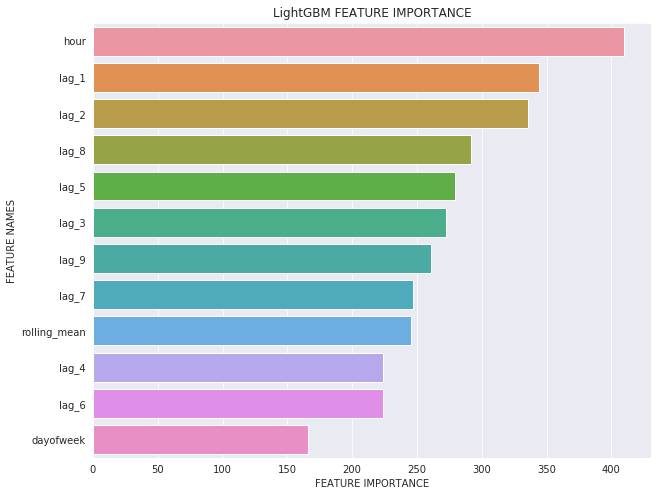

In [44]:
#Посмотрим feature importance у модели lightgbm
plot_feature_importance(model.feature_importances_,X_test.columns,'LightGBM ')

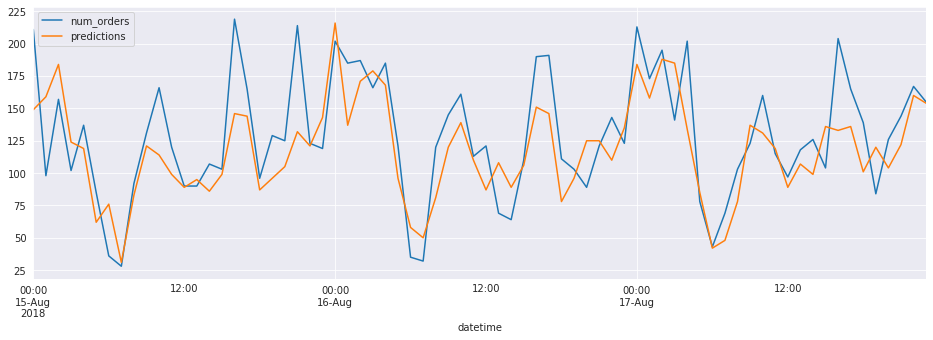

In [45]:
# Покажем на графике предсказания модели

graph = y_test.copy()
predictions_taxi = pd.DataFrame(data = predictions, columns = ['predictions'], index = X_test.index.copy())
df_out = pd.merge(graph, predictions_taxi, how = 'left', left_index = True, right_index = True)
df_out['predictions'] = df_out['predictions'].astype('int64')
df_out['2018-08-15':'2018-08-17'].plot(figsize=(16,5))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Отлично!<br>
Глядя на график, а также добавляя отдельный анализ остатков, можно будет хорошо порабоать над улучшением модели..<br>

# Вывод

**RMSE на тесте составил 43.Модель неплохо описывает реальные заказы, но есть куда тюнить модели и перебирать другие параметры.**

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Александр, ок, справился хорошо с работой!<br>
Видно, что этот скил уже достаточно сильный у тебя.<br>
    
И если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие комментарии, чтобы как-то раскрыть её особенности.<br>

Оставил несколько комментариев в тексте.<br>
Возможно, что у тебя остались или появились вопросы?
 
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ

<div style="background: #ffffcc
; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='green'><br>
Здравствуйте! :)
У меня возникло два вопроса.


Правильно ли я понимаю, что модель именно обучается засчёт исторических паттернов, таких как (сезонность тренд, если их брать во внимание на разные интервалы), а потом переносит их на горизонт прогнозирования ?
И для чего могут понадобиться остатки при декокомпозиции ряда ?
 
<font color='green'>
Заранее спасибо)<BR>
Вопросов больше нет)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Привет, Александр!<br>
Отличные вопросы)<br>
1) совершенно верно, изучаем историю - ищем закономерости в ней. И предполагаем, что эти закономерности останутся в будущем и продливаем на следующий период и тренд и сезонность. Но есть модели (и регрессионные в том числе), которые позволяют, как и писал ниже, вставлять ещё внешние фаткоры.<br>
    
2) Про остатки: важная тема. Ниже раскрою, а тут напишу кратко. Даже если метрика хорошая, а остатки нет - модель лучше не использоать. Только остатки - это НЕ при декомозиции. Остатки=факт минус прогноз. Это мы построили модель, а потом анализируем разницу между фактом и предсказанными. В идеале - они должны быть случайные (см. ниже)<br>


Если будет возможность тебе однозначно интересно посмотреть разные практические истории вот здесь:<br>
https://ibf.org/knowledge - заморский институт бизнес-прогнозирования.<br>
Там и статьи можно накопать, и методы посмомтерть...<br>

Есть классический труд (он НЕ ML, а исключительно на эксель). Но для понимания сути временных рядов - то, что надо:<br>
УИЧЕРН "Бизнес-прогнозирование"<br>

Идеологически по системе прогнозирования, интересно почитать<br>
ТОМАС УОЛЛАС, Р. СТАЛЬ "планирование продаж и операций" SO&P<br><br>     

Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБЧЕНИЯ!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Отлично с анализом остатков. Обычно ещё смотрят три свойства:<br>
1) Нормальность (график гистограмма)<br>
2) Постоянство дисперсии (разброса) ошибки на всём протяжении модели (график скатерплот остаткков и предсказанных значений)<br>
3) автокореляция остатков (график автокорреляции)<br>
    
Если всё ок - говорят, что модель адекватна (не смотря на метрику).<br>
Если нарушен 1 и 3 свойство - модель можно улучшить.<br>
Если нарушен 2 модель использовать нельзя.<br>
    
Ниже на картинке постарался показать хорошие-плохие остатки)

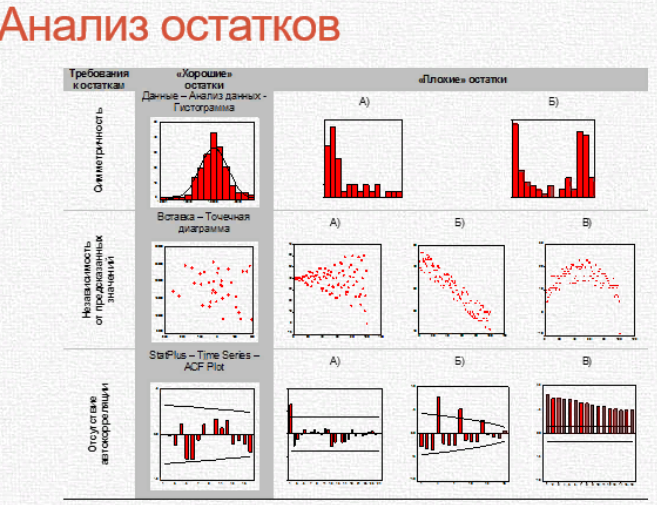

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Хотел бы оставить несколько идей для твоих будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.